In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# System libraries
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_context("paper")
sns.set_palette("colorblind")

sns.set(style="whitegrid", font="Helvetica", font_scale=2)

In [2]:
# Define your parameters
topology = 'star'
U = 50 # Number of Users
A = 1000.0  # Area size in meters
F = 0.7 # Fraction of the moving users
B = 40 # Number of Buildings
T = 18000.0 # Simulation time in seconds
chunk_size = 7 #number of measurments per UE (same as number of UAVs)


folder_name = f"{topology}-U{U}-A{A}-F{F}-B{B}-T{T}"
simulation_results_path = os.path.join('..', 'ns3-install', 'ns-3-dev', 'simulation_results')


In [3]:
# Construct path to UE measurements CSV file
ue_msr_file_path = os.path.join(simulation_results_path, folder_name, f"{folder_name}-ue_measurements.csv")

# Read UE measurements data into DataFrame
ue_msr_df = pd.read_csv(ue_msr_file_path)

# Remove rows with missing RSRQ values and reset index
ue_msr_filtered_df = ue_msr_df.dropna(subset=['RSRQ (dB)'])
ue_msr_filtered_df.reset_index(drop=True, inplace=True)

# Initialize IMSI column with NaN values
ue_msr_filtered_df['IMSI'] = np.nan

# Display first 14 rows of filtered DataFrame
ue_msr_filtered_df.head(14)

,Time (s),RNTI (for serving),Connection Type,Cell ID,RSRP (dBm),RSRQ (dB),IMSI
0,0.4,NaN,neighbor,1,-92.9366,-14.179763,NaN
1,0.4,NaN,neighbor,2,-94.9012,-16.144594,NaN
2,0.4,NaN,neighbor,3,-94.9621,-16.204879,NaN
3,0.4,NaN,neighbor,4,-94.0659,-15.308035,NaN
4,0.4,NaN,neighbor,5,-90.2602,-11.501691,NaN
5,0.4,3.0,serving,6,-84.9348,-6.179248,NaN
6,0.4,NaN,neighbor,7,-90.0734,-11.317876,NaN
7,0.4,NaN,neighbor,1,-91.3396,-14.074178,NaN
8,0.4,NaN,neighbor,2,-85.5155,-8.252662,NaN
9,0.4,14.0,serving,3,-84.0687,-6.801553,NaN


In [4]:
# Convert time values to categorical indices and get unique times
# time_indices: array of integers mapping each time to its position in unique_times
# unique_times: array of unique time values in sorted order
time_indices, unique_times = pd.factorize(ue_msr_filtered_df['Time (s)'])
unique_times

Index([    0.4,     0.6,     0.8,     1.0,     1.2,     1.4,     1.6,     1.8,
           2.0,     2.2,
       ...
       17998.0, 17998.2, 17998.4, 17998.6, 17998.8, 17999.0, 17999.2, 17999.4,
       17999.6, 17999.8],
      dtype='float64', length=89998)

In [5]:
# Construct path to handover report CSV file
handover_file_path = os.path.join(simulation_results_path, folder_name, f"{folder_name}-handover_report.csv")

# Read handover data into DataFrame
handover_data = pd.read_csv(handover_file_path)

# Filter out data before 0.2s and reset index
# This removes initial transient period
handover_data = handover_data[handover_data['Time (s)'] > 0.2].reset_index(drop=True)

# Display first 14 rows of handover data
handover_data.head(14)

,Time (s),IMSI,RNTI,Cell ID
0,17.2,33,7,2
1,17.8,30,11,5
2,35.4,6,5,4
3,43.8,32,12,5
4,45.2,21,15,6
5,56.2,3,16,6
6,95.8,27,6,4
7,97.6,2,8,2
8,102.2,25,17,6
9,103.8,8,9,2


In [6]:
# Construct path to UE-eNB connections CSV file
ue_enb_cx_file_path = os.path.join(simulation_results_path, folder_name, f"{folder_name}-ue_enb_connections.csv")

# Read UE-eNB connections data into DataFrame
ue_enb_cx_df = pd.read_csv(ue_enb_cx_file_path)

# Extract and convert time values to float with one decimal place
ue_enb_cx_df['Time (s)'] = ue_enb_cx_df['Time (s)'].astype(str).str.extract(r'(\d+\.\d)').astype(float)

# Filter rows to keep only times ending in 0,2,4,6,8
ue_enb_cx_df = ue_enb_cx_df[ue_enb_cx_df['Time (s)'].astype(str).str.extract(r'\.(\d)')[0].isin(['0', '2', '4', '6', '8'])]

# Remove any duplicate rows
ue_enb_cx_df = ue_enb_cx_df.drop_duplicates(subset=None)

# Display first 14 rows of the processed DataFrame
ue_enb_cx_df.head(14)

,Time (s),IMSI,RNTI,Cell ID
0,0.4,1,3,6
1,0.4,2,14,3
2,0.4,3,2,5
3,0.4,4,3,3
4,0.4,5,16,3
5,0.4,6,1,1
6,0.4,7,3,2
7,0.4,8,10,7
8,0.4,9,10,5
9,0.4,10,6,2


In [7]:
# finding imsi using the rnti + cell id from the ue_enb_cx_df
rnti_cell_imsi_mapping = ue_enb_cx_df.set_index(['RNTI', 'Cell ID'])['IMSI'].to_dict()

In [8]:
# Create a mapping dictionary that links RNTI (Radio Network Temporary Identifier) and Cell ID pairs 
# to their corresponding IMSI (International Mobile Subscriber Identity) values
# This allows efficient lookups of IMSI values based on RNTI and Cell ID combinations
rnti_cell_imsi_mapping = ue_enb_cx_df.set_index(['RNTI', 'Cell ID'])['IMSI'].to_dict()

# Helper function to look up IMSI value for any row based on its RNTI and Cell ID
# Returns NaN if no matching IMSI is found for the given RNTI+Cell ID combination
def get_imsi(row):
    key = (row['RNTI'], row['Cell ID'])
    return rnti_cell_imsi_mapping.get(key, float('nan'))

# Extract only the rows where Connection Type is 'serving' into a separate dataframe
# These represent active connections between UEs and their serving cells
serving_cells_df = ue_msr_filtered_df[ue_msr_filtered_df['Connection Type'] == 'serving']

# Helper function specifically for serving cell rows that uses the 'RNTI (for serving)' column
# This handles the different column name for RNTI in serving cell records
def get_imsi_for_serving(row):
    key = (row['RNTI (for serving)'], row['Cell ID'])
    return rnti_cell_imsi_mapping.get(key, float('nan'))

# Update the IMSI values but only for rows where Connection Type is 'serving'
# This preserves the IMSI values for non-serving (neighbor) cell measurements
ue_msr_filtered_df.loc[ue_msr_filtered_df['Connection Type'] == 'serving', 'IMSI'] = serving_cells_df.apply(get_imsi_for_serving, axis=1)

# Reset the index to ensure continuous integer indexing after the updates
ue_msr_filtered_df.reset_index(drop=True, inplace=True)

In [9]:
# Process the DataFrame in chunks to assign IMSI values
# Each chunk contains both serving and neighbor cell measurements for a UE
for i in range(0, len(ue_msr_filtered_df), chunk_size):
    
    # Extract the current chunk of measurements
    chunk = ue_msr_filtered_df.iloc[i:i+chunk_size]
    
    # Find any rows in this chunk that represent serving cell connections
    # There should be one serving cell connection per chunk
    serving_row = chunk[chunk['Connection Type'] == 'serving']
    
    # If a serving cell connection exists in this chunk
    if not serving_row.empty:
        # Get the IMSI from the serving cell row
        # This IMSI identifies the UE that made all measurements in this chunk
        imsi_value = serving_row['IMSI'].values[0]
        
        # Propagate the IMSI to all rows in the chunk
        # This links neighbor cell measurements to the UE that made them
        ue_msr_filtered_df.loc[i:i+chunk_size, 'IMSI'] = imsi_value

In [ ]:
# Process chunks of measurements that only contain neighbor cell records
# This handles cases where we have no serving cell measurement but can match
# the timestamp to a handover event to identify the UE
match_count = 0
for i in range(0, len(ue_msr_filtered_df), chunk_size):
    # Extract a chunk of 7 consecutive measurements
    chunk = ue_msr_filtered_df.iloc[i:i + chunk_size]
    
    # Only process chunks where all measurements are from neighbor cells
    # These chunks have no serving cell to directly identify the UE
    if (chunk['Connection Type'] == 'neighbor').all():
        # Check each measurement's timestamp against handover events
        for index, row in chunk.iterrows():
            # Look for a handover event that occurred at the same time
            # This would indicate which UE was active at this timestamp
            matching_handover = handover_data[handover_data['Time (s)'] == row['Time (s)']]
            
            # If we find a matching handover event, we can identify the UE
            if not matching_handover.empty:
                # Get the IMSI from the handover event - this identifies the UE
                imsi_value = matching_handover['IMSI'].iloc[0]
                # Update all measurements in this chunk with the UE's IMSI
                # This links these neighbor cell measurements to the correct UE
                ue_msr_filtered_df.loc[chunk.index, 'IMSI'] = imsi_value
                match_count += 1
                # No need to check other measurements in this chunk
                break

print(f"Number of chunks matched with handover events: {match_count}")

In [12]:
# Track how many chunks had their IMSI values filled in
updated_chunks_count = 0

# Process the DataFrame in chunks of 7 rows (representing measurements from all cells at one timestamp)
for i in range(0, len(ue_msr_filtered_df), chunk_size):
    # Extract the current chunk of 7 measurements
    chunk = ue_msr_filtered_df.iloc[i:i + chunk_size]
    
    # If any measurement in this chunk has an IMSI value, we can use it
    # to identify which UE made all measurements in the chunk
    if chunk['IMSI'].notna().any():
        # Get the first valid IMSI we find - this identifies the UE
        # that made all measurements in this chunk
        imsi_value = chunk['IMSI'].dropna().iloc[0]
        
        # Some measurements in this chunk may be missing their IMSI
        # If so, we can fill them in since we know they were made by the same UE
        if chunk['IMSI'].isna().any():
            # Propagate the IMSI we found to all measurements in the chunk
            # that are missing an IMSI value
            ue_msr_filtered_df.loc[chunk.index, 'IMSI'] = ue_msr_filtered_df.loc[chunk.index, 'IMSI'].fillna(imsi_value)
            
            # Keep track of how many chunks we updated
            updated_chunks_count += 1

# Report how many chunks had missing IMSI values that we were able to fill in
print(f"Number of chunks where IMSI was updated: {updated_chunks_count}")

Number of chunks where IMSI was updated: 24


In [13]:
# Find rows where IMSI (International Mobile Subscriber Identity) is missing (NaN)
# This helps identify measurements that haven't been matched to a specific UE yet
nan_rows = ue_msr_filtered_df[ue_msr_filtered_df['IMSI'].isna()]

# Display these unmatched measurements to assess how many remain to be processed
# and potentially identify patterns in the missing data
print(nan_rows)

Empty DataFrame
Columns: [Time (s), RNTI (for serving), Connection Type, Cell ID, RSRP (dBm), RSRQ (dB), IMSI]
Index: []


In [14]:
# Process the DataFrame in chunks of 7 measurements (one per cell) to identify serving cells
# This is needed because each UE should have exactly one serving cell at any given time
for i in range(0, len(ue_msr_filtered_df), chunk_size):
    # Extract measurements from all cells at this timestamp
    chunk = ue_msr_filtered_df.iloc[i:i+chunk_size]
    
    # If all cells are marked as neighbors, we need to determine which one should be serving
    # This can happen if the serving cell information was lost or not properly recorded
    if (chunk['Connection Type'] == 'neighbor').all():
        # The cell with the highest Reference Signal Received Quality (RSRQ)
        # is most likely to be the serving cell, as UEs typically connect
        # to the cell with the best signal quality
        max_rsrq_index = chunk['RSRQ (dB)'].idxmax()

        # Update the connection type for the cell with best RSRQ to be the serving cell
        # This ensures each UE has exactly one serving cell at this timestamp
        ue_msr_filtered_df.at[max_rsrq_index, 'Connection Type'] = 'serving'

In [15]:
# Due to irregular NS-3 logging output, we need to manually fix some IMSI assignments
# Here we identify measurements from a specific UE based on its RNTI and Cell ID
# since the IMSI values were not consistently logged
condition = (ue_msr_filtered_df['RNTI (for serving)'] == 2) & (ue_msr_filtered_df['Cell ID'] == 1)

# Manually assign IMSI 44 to these measurements to ensure we can properly track
# this UE's connection quality and cell associations over time, working around
# the NS-3 logging irregularities
ue_msr_filtered_df.loc[condition, 'IMSI'] = 44

In [16]:
# Process measurements in chunks of 7 rows (one per cell) to ensure consistent IMSI assignment
# This is needed because measurements from the same UE at the same timestamp should have the same IMSI
for i in range(0, len(ue_msr_filtered_df), chunk_size):
    # Extract a chunk of 7 measurements that were taken at the same timestamp
    chunk = ue_msr_filtered_df.iloc[i:i + chunk_size]
    
    # If any measurement in this chunk has IMSI=44, then all measurements in the chunk
    # must be from the same UE (since they're at the same timestamp), so they should
    # all have IMSI=44. This fixes cases where the IMSI wasn't properly logged.
    if (chunk['IMSI'] == 44).any():
        # Update IMSI value for all rows in this chunk to maintain consistency
        ue_msr_filtered_df.loc[chunk.index, 'IMSI'] = 44

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

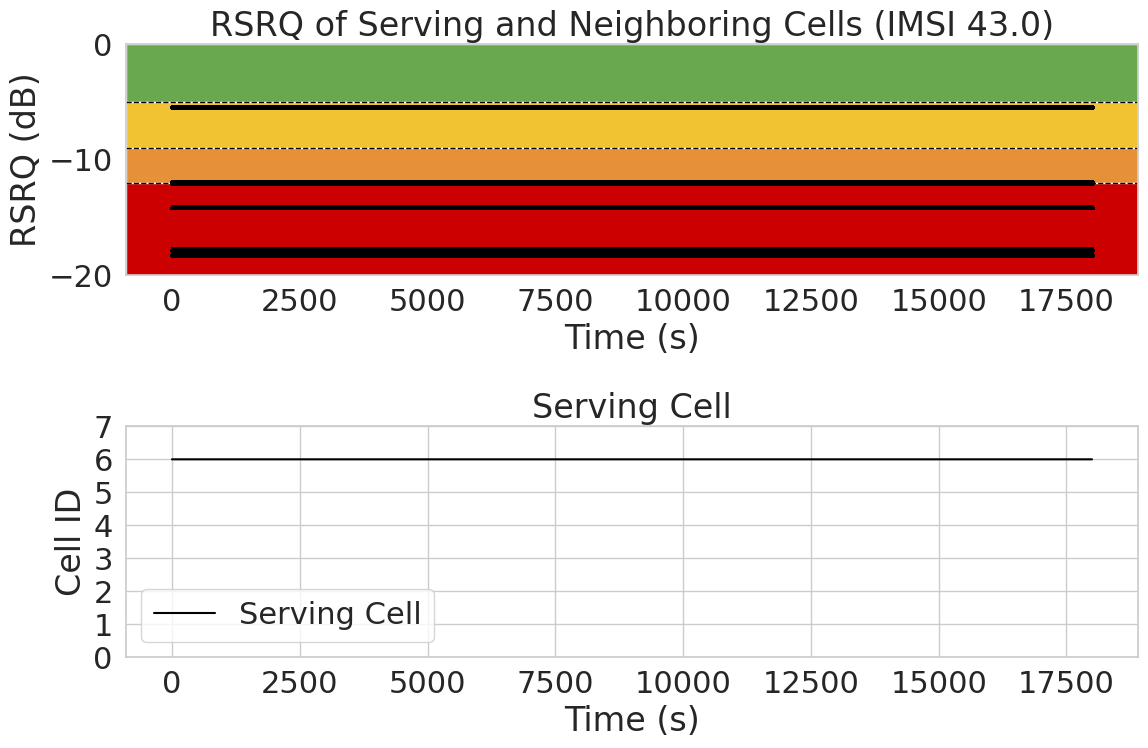

In [17]:
# Filter data for a specific IMSI to plot the RSRQ and Cell ID connection over time
imsi_value = 43.0

# Get serving and neighboring cell measurements for this IMSI
serving_df = ue_msr_filtered_df[(ue_msr_filtered_df['Connection Type'] == 'serving') & (ue_msr_filtered_df['IMSI'] == imsi_value)]
neighbor_df = ue_msr_filtered_df[(ue_msr_filtered_df['Connection Type'] == 'neighbor') & (ue_msr_filtered_df['IMSI'] == imsi_value)]

# Clean up duplicate measurements
neighbor_df = neighbor_df.drop_duplicates(subset=['Time (s)', 'Cell ID'])

# Get unique cell IDs for plotting
unique_cell_ids = neighbor_df['Cell ID'].unique()

# Define marker styles for different cells
markers = ['x', '^', '*', 's', ]

# Create two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Plot 1: RSRQ values over time
axes[0].plot(serving_df['Time (s)'], serving_df['RSRQ (dB)'], marker='o', label='Serving Cell RSRQ', color='black', markersize=2)
axes[0].set_title(f'RSRQ of Serving and Neighboring Cells (IMSI {imsi_value})')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('RSRQ (dB)')
axes[0].grid(False)
axes[0].set_ylim(-20, 0)

# Define and add RSRQ quality regions
rsrq_categories = {
    'Excellent': (-5, 0),
    'Good': (-9, -5),
    'Fair': (-12, -9),
    'Poor': (-25, -12)
}

colors_mapping = {
    'Excellent': '#6AA84F',
    'Good': '#F1C232',
    'Fair': '#E69138',
    'Poor': '#CC0000'
}

# Add colored regions and boundary lines
for category, (lower_bound, upper_bound) in rsrq_categories.items():
    axes[0].axhspan(lower_bound, upper_bound, facecolor=colors_mapping[category], alpha=1, label=f'{category} RSRQ')

axes[0].axhline(y=-5, color='black', linestyle='dashed', linewidth=1)
axes[0].axhline(y=-9, color='black', linestyle='dashed', linewidth=1)
axes[0].axhline(y=-12, color='black', linestyle='dashed', linewidth=1)

# Plot neighboring cell RSRQ values
for i, cell_id in enumerate(unique_cell_ids):
    cell_df = neighbor_df[neighbor_df['Cell ID'] == cell_id]
    marker = markers[i % len(markers)]
    axes[0].plot(cell_df['Time (s)'], cell_df['RSRQ (dB)'], marker=marker, label=f'Neighbor Cell ID {cell_id}', 
                 color='black', markersize=2)

# Plot 2: Active cell connections over time  
axes[1].step(serving_df['Time (s)'], serving_df['Cell ID'], where='post', color='black', zorder=5, label='Serving Cell')
axes[1].set_yticks(range(0, len(unique_cell_ids) + 2, 1))
axes[1].set_title(f'Serving Cell')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Cell ID')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [18]:
# Convert categorical columns to numerical indices for tensor dimensions
# This creates mappings between original values and 0-based indices
# time_indices: Maps each timestamp to a unique index
# unique_times: Array of unique timestamp values
time_indices, unique_times = pd.factorize(ue_msr_filtered_df['Time (s)'])
imsi_indices, unique_imsis = pd.factorize(ue_msr_filtered_df['IMSI'])
cellid_indices, unique_cellids = pd.factorize(ue_msr_filtered_df['Cell ID'])

# Create an empty 3D tensor to store RSRQ measurements
# Dimensions are: [timestamps x UE IMSIs x Cell IDs]
# Initialize with NaN since not all combinations will have measurements
rsrq_tensor = np.full(
    (len(unique_times), len(unique_imsis), len(unique_cellids)),
    np.nan
)

# Populate the tensor with RSRQ values using the computed indices
# This efficiently maps each measurement to its correct position in the tensor
# Using vectorized operations for better performance
rsrq_tensor[time_indices, imsi_indices, cellid_indices] = ue_msr_filtered_df['RSRQ (dB)'].values

# Print tensor dimensions for verification
# First dimension: Number of unique timestamps
# Second dimension: Number of unique UEs (IMSIs)
# Third dimension: Number of unique cells
print("RSRQ tensor shape (time steps, IMSIs, Cell IDs):", rsrq_tensor.shape)

RSRQ tensor shape (time steps, IMSIs, Cell IDs): (89998, 50, 7)


In [19]:
# Create a binary tensor where 1 represents good signal quality and 0 represents poor quality
# RSRQ > -12 dB is considered Fair to Excellent quality based on 3GPP standards
# RSRQ <= -12 dB is considered Poor quality and may result in connection issues
filtered_rsrq_tensor = np.where(rsrq_tensor > -12, 1, 0)

# Construct the save path by joining the simulation results directory with the scenario folder
scenario_folder_path = os.path.join(simulation_results_path, folder_name)

# Create the full file path for saving the tensor, using the folder name as prefix
# The tensor is saved with '-q_tensor.npy' suffix to indicate it's a quality tensor
tensor_save_path = os.path.join(scenario_folder_path, f'{folder_name}-q-tensor.npy')

# Save the binary quality tensor to disk in NumPy's .npy format for efficient loading
np.save(tensor_save_path, filtered_rsrq_tensor)

# Print confirmation message with the full save path
print(f"Tensor saved at: {tensor_save_path}")

Tensor saved at: ../ns3-install/ns-3-dev/simulation_results/star-U50-A1000.0-F0.7-B40-T18000.0/q_tensor_star-U50-A1000.0-F0.7-B40-T18000.0.npy
